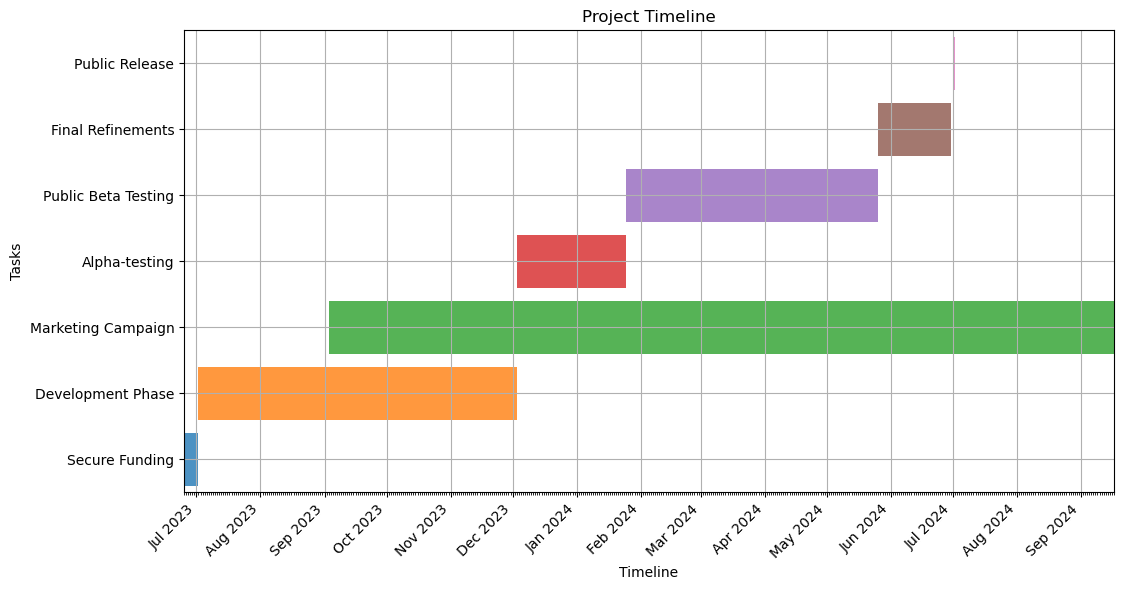

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

def create_gantt_chart(tasks, width, height, output_file):
    fig, ax = plt.subplots(figsize=(width, height))

    # Set y-axis limit and ticks
    ax.set_ylim(0, len(tasks) * 10)
    ax.set_yticks(range(5, len(tasks) * 10, 10))
    ax.set_yticklabels([task[0] for task in tasks])

    # Set x-axis limit and format
    ax.set_xlim(min(tasks, key=lambda x: x[1])[1], max(tasks, key=lambda x: x[2])[2])
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_minor_locator(mdates.DayLocator())

    # Rotate the x-axis labels
    plt.xticks(rotation=45, ha='right')

    # Plot the tasks
    for i, task in enumerate(tasks):
        ax.barh(i * 10 + 5, task[2] - task[1], left=task[1], height=8, align='center', alpha=0.8)

    plt.xlabel('Timeline')
    plt.ylabel('Tasks')
    plt.title('Project Timeline')
    plt.grid(True)

    plt.savefig(output_file, dpi=300, bbox_inches='tight')


# Example tasks: [(task_name, start_date, end_date), ...]
tasks = [
    ('Secure Funding', datetime.date(2023, 6, 25), datetime.date(2023, 7, 2)),
    ('Development Phase', datetime.date(2023, 7, 2), datetime.date(2023, 12, 3)),
    ('Marketing Campaign', datetime.date(2023, 9, 3), datetime.date(2024, 9, 17)),
    ('Alpha-testing', datetime.date(2023, 12, 3), datetime.date(2024, 1, 25)),
    ('Public Beta Testing', datetime.date(2024, 1, 25), datetime.date(2024, 5, 26)),
    ('Final Refinements', datetime.date(2024, 5, 26), datetime.date(2024, 6, 30)),
    ('Public Release', datetime.date(2024, 7, 1), datetime.date(2024, 7, 2)),
]

width = 12  # Width of the Gantt chart in inches
height = 6  # Height of the Gantt chart in inches
output_file = 'gantt_chart.png'  # Output PNG file name

create_gantt_chart(tasks, width, height, output_file)
